In [1]:
import pandas as pd
from fbprophet import Prophet

In [3]:
df = pd.read_csv('/content/sample_data/DOGE-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds         y
0    2020-07-12  0.003630
1    2020-07-13  0.003178
2    2020-07-14  0.003294
3    2020-07-15  0.003085
4    2020-07-16  0.002995
..          ...       ...
361  2021-07-08  0.207597
362  2021-07-09  0.219864
363  2021-07-10  0.213920
364  2021-07-11  0.215856
365  2021-07-12  0.207520

[366 rows x 2 columns]


In [4]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-07-12
1   2020-07-13
2   2020-07-14
3   2020-07-15
4   2020-07-16
..         ...
726 2022-07-08
727 2022-07-09
728 2022-07-10
729 2022-07-11
730 2022-07-12

[731 rows x 1 columns]


In [6]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2021-12-25,0.692714,0.570688,0.807299
532,2021-12-26,0.693181,0.576717,0.806321
533,2021-12-27,0.692750,0.567735,0.807812
534,2021-12-28,0.698489,0.582974,0.812346
535,2021-12-29,0.699595,0.585055,0.820465
...,...,...,...,...
726,2022-07-08,1.071448,0.868318,1.281986
727,2022-07-09,1.069527,0.856535,1.279394
728,2022-07-10,1.069993,0.864867,1.273397
729,2022-07-11,1.069563,0.858228,1.278330


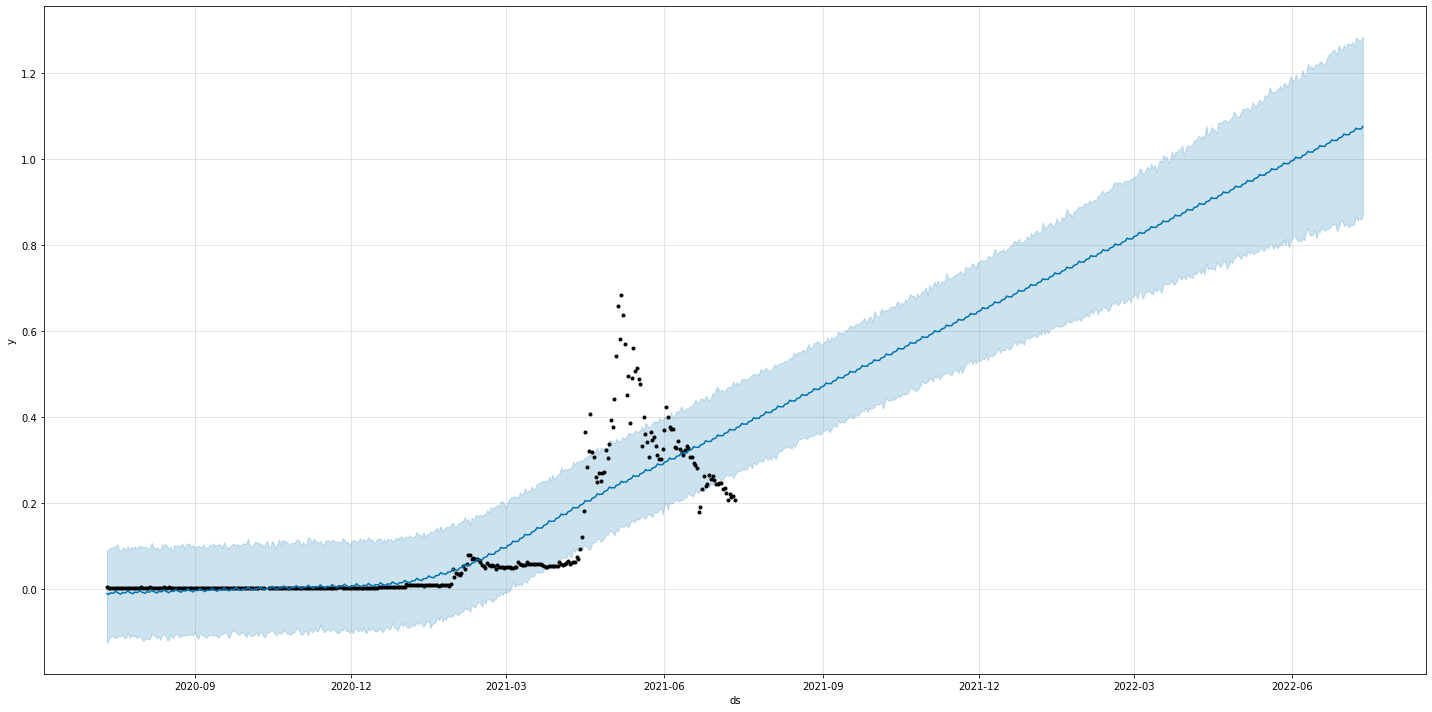

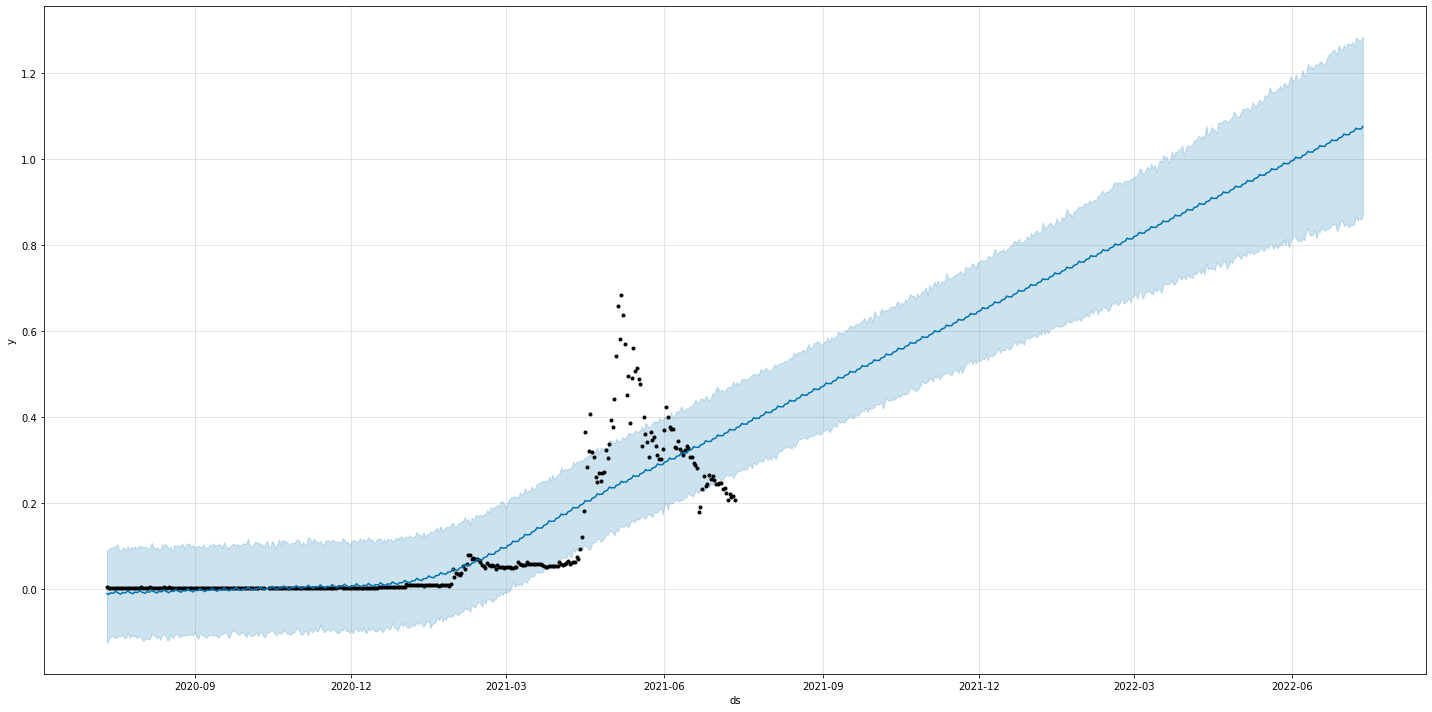

In [7]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))